<a href="https://colab.research.google.com/github/Harshal-Kharkar/fmnist/blob/main/fmnit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# clone repo

In [1]:
!git config --global user.name "harshal"
!git config --global user.email "h.kharkar12345@gmail.com"
!git config --global user.password "password"

In [2]:
!git clone "https://github.com/Harshal-Kharkar/fmnist"

Cloning into 'fmnist'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [3]:
%cd fmnist/

/content/fmnist


In [4]:
%ls


README.md


In [5]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [10]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ziN7gJHnr-MQb0_eFsPfPfiiDuvsmqVH' -O your_file.csv


--2025-01-08 10:08:23--  https://drive.google.com/uc?export=download&id=1ziN7gJHnr-MQb0_eFsPfPfiiDuvsmqVH
Resolving drive.google.com (drive.google.com)... 172.217.203.139, 172.217.203.102, 172.217.203.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ziN7gJHnr-MQb0_eFsPfPfiiDuvsmqVH&export=download [following]
--2025-01-08 10:08:23--  https://drive.usercontent.google.com/download?id=1ziN7gJHnr-MQb0_eFsPfPfiiDuvsmqVH&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.12.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13317867 (13M) [application/octet-stream]
Saving to: ‘your_file.csv’

your_file.csv       100%[===================>]  12.70M  --.-K

# loading data and lib


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt

In [13]:
torch.manual_seed(42)

In [87]:
df = pd.read_csv('your_file.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


# data visualization

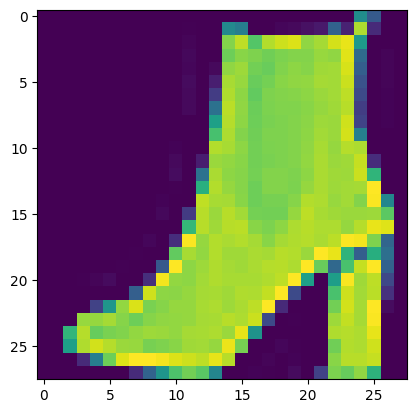

In [88]:
plt.imshow(df.iloc[0,1:].values.reshape(28,28))

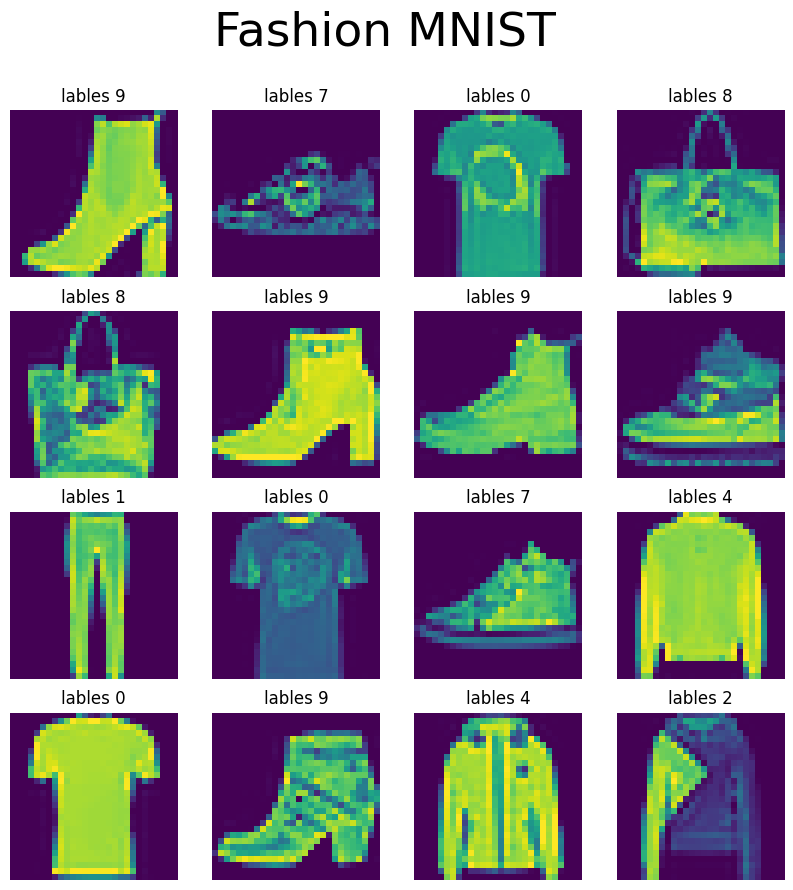

In [89]:
fig , axes = plt.subplots(4,4 ,figsize=(10,10))
fig.suptitle("Fashion MNIST",fontsize=34)
for i , ax in enumerate(axes.flat):
  ax.imshow(df.iloc[i,1:].values.reshape(28,28))
  ax.axis('off')
  ax.set_title(f"lables {df.iloc[i,0]}")
plt.show()

In [90]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [91]:
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
x_train=x_train/255
x_test=x_test/255

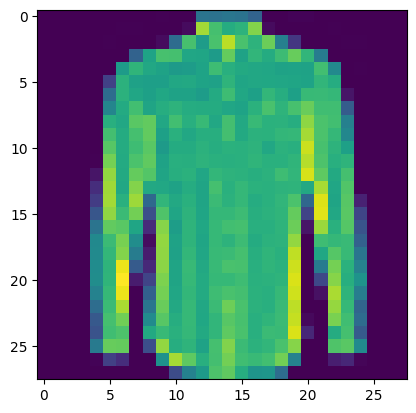

In [93]:
plt.imshow(x_train[1].reshape(28,28))

# model creation

In [94]:
class CustomDataset(Dataset):
  def __init__(self,features,lables):
    self.features=torch.tensor(features,dtype=torch.float32)
    self.lables=torch.tensor(lables,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx],self.lables[idx]


In [95]:
train_dataset=CustomDataset(x_train,y_train)
test_dataset=CustomDataset(x_test,y_test)

In [96]:
len(train_dataset),len(test_dataset)

(4800, 1200)

In [97]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

Text(0.5, 1.0, 'tensor(7)')

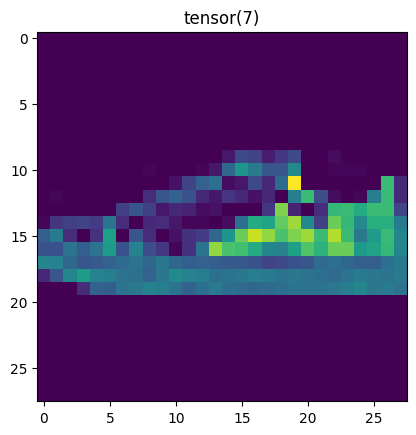

In [98]:
plt.imshow(train_dataset[0][0].reshape(28,28))
plt.title(train_dataset[0][1])

In [99]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [100]:
class model(nn.Module):
  def __init__(self,num_features):
    super(model,self).__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,x):
    return self.model(x)


In [101]:
epoch =100
lr=0.001

In [102]:
model = model(x_train.shape[1])


criterion = nn.CrossEntropyLoss()


optimizer = optim.Adam(model.parameters(), lr=lr)

In [103]:
from tqdm import tqdm

In [104]:
for epoch in tqdm(range(epoch)):

  total_epoch_loss=0
  for batch_feature , batch_lables in train_loader:
    optimizer.zero_grad()
    output=model(batch_feature)
    loss=criterion(output,batch_lables)
    loss.backward()
    optimizer.step()
    total_epoch_loss+=loss.item()
  print(f"Epoch {epoch+1}/{epoch}, Loss: {total_epoch_loss/len(train_loader)}")

  1%|          | 1/100 [00:00<00:36,  2.70it/s]

Epoch 1/0, Loss: 1.0784683229525884


  2%|▏         | 2/100 [00:00<00:37,  2.60it/s]

Epoch 2/1, Loss: 0.6358180292447408


  3%|▎         | 3/100 [00:01<00:37,  2.58it/s]

Epoch 3/2, Loss: 0.5479650175571442


  4%|▍         | 4/100 [00:01<00:36,  2.63it/s]

Epoch 4/3, Loss: 0.5072295572360357


  5%|▌         | 5/100 [00:01<00:38,  2.47it/s]

Epoch 5/4, Loss: 0.4589821873108546


  6%|▌         | 6/100 [00:02<00:40,  2.33it/s]

Epoch 6/5, Loss: 0.420798542201519


  7%|▋         | 7/100 [00:02<00:41,  2.24it/s]

Epoch 7/6, Loss: 0.39710761631528535


  8%|▊         | 8/100 [00:03<00:41,  2.21it/s]

Epoch 8/7, Loss: 0.3814252156019211


  9%|▉         | 9/100 [00:03<00:41,  2.17it/s]

Epoch 9/8, Loss: 0.34620139956474305


 10%|█         | 10/100 [00:04<00:41,  2.17it/s]

Epoch 10/9, Loss: 0.3343498482306798


 11%|█         | 11/100 [00:04<00:42,  2.11it/s]

Epoch 11/10, Loss: 0.3194597079853217


 12%|█▏        | 12/100 [00:05<00:41,  2.14it/s]

Epoch 12/11, Loss: 0.2990827970703443


 13%|█▎        | 13/100 [00:05<00:40,  2.15it/s]

Epoch 13/12, Loss: 0.28398118500908215


 14%|█▍        | 14/100 [00:06<00:40,  2.13it/s]

Epoch 14/13, Loss: 0.2734766644239426


 15%|█▌        | 15/100 [00:06<00:39,  2.14it/s]

Epoch 15/14, Loss: 0.2599698008100192


 16%|█▌        | 16/100 [00:07<00:39,  2.14it/s]

Epoch 16/15, Loss: 0.24908123832195997


 17%|█▋        | 17/100 [00:07<00:39,  2.08it/s]

Epoch 17/16, Loss: 0.2381806641817093


 18%|█▊        | 18/100 [00:08<00:39,  2.06it/s]

Epoch 18/17, Loss: 0.22555758136014142


 19%|█▉        | 19/100 [00:08<00:41,  1.97it/s]

Epoch 19/18, Loss: 0.20542507412532965


 20%|██        | 20/100 [00:09<00:40,  1.97it/s]

Epoch 20/19, Loss: 0.19606773922840753


 21%|██        | 21/100 [00:09<00:44,  1.77it/s]

Epoch 21/20, Loss: 0.1976588650792837


 22%|██▏       | 22/100 [00:10<00:47,  1.65it/s]

Epoch 22/21, Loss: 0.18724623064200083


 23%|██▎       | 23/100 [00:11<00:49,  1.55it/s]

Epoch 23/22, Loss: 0.18734647771964472


 24%|██▍       | 24/100 [00:12<00:49,  1.52it/s]

Epoch 24/23, Loss: 0.17777095639457305


 25%|██▌       | 25/100 [00:12<00:50,  1.47it/s]

Epoch 25/24, Loss: 0.16890866123139858


 26%|██▌       | 26/100 [00:13<00:46,  1.60it/s]

Epoch 26/25, Loss: 0.15821037967999776


 27%|██▋       | 27/100 [00:13<00:42,  1.71it/s]

Epoch 27/26, Loss: 0.16347775793323915


 28%|██▊       | 28/100 [00:14<00:39,  1.82it/s]

Epoch 28/27, Loss: 0.15690028821428617


 29%|██▉       | 29/100 [00:14<00:37,  1.90it/s]

Epoch 29/28, Loss: 0.13936445094645022


 30%|███       | 30/100 [00:15<00:35,  1.96it/s]

Epoch 30/29, Loss: 0.1259092938651641


 31%|███       | 31/100 [00:15<00:34,  2.01it/s]

Epoch 31/30, Loss: 0.12324091969057918


 32%|███▏      | 32/100 [00:16<00:33,  2.04it/s]

Epoch 32/31, Loss: 0.12177241538961728


 33%|███▎      | 33/100 [00:16<00:32,  2.05it/s]

Epoch 33/32, Loss: 0.11594979230314494


 34%|███▍      | 34/100 [00:17<00:32,  2.05it/s]

Epoch 34/33, Loss: 0.11320503214063744


 35%|███▌      | 35/100 [00:17<00:31,  2.06it/s]

Epoch 35/34, Loss: 0.10700538162452479


 36%|███▌      | 36/100 [00:18<00:30,  2.07it/s]

Epoch 36/35, Loss: 0.09688044644892216


 37%|███▋      | 37/100 [00:18<00:30,  2.08it/s]

Epoch 37/36, Loss: 0.09930882405489683


 38%|███▊      | 38/100 [00:18<00:29,  2.10it/s]

Epoch 38/37, Loss: 0.09623318779592713


 39%|███▉      | 39/100 [00:19<00:28,  2.11it/s]

Epoch 39/38, Loss: 0.08361887027819952


 40%|████      | 40/100 [00:19<00:28,  2.13it/s]

Epoch 40/39, Loss: 0.09724270342538754


 41%|████      | 41/100 [00:20<00:27,  2.13it/s]

Epoch 41/40, Loss: 0.09547000216941039


 42%|████▏     | 42/100 [00:20<00:27,  2.13it/s]

Epoch 42/41, Loss: 0.09816847370316585


 43%|████▎     | 43/100 [00:21<00:26,  2.13it/s]

Epoch 43/42, Loss: 0.09448513259645551


 44%|████▍     | 44/100 [00:21<00:26,  2.10it/s]

Epoch 44/43, Loss: 0.08400332839228213


 45%|████▌     | 45/100 [00:22<00:26,  2.05it/s]

Epoch 45/44, Loss: 0.08701286285184323


 46%|████▌     | 46/100 [00:22<00:28,  1.91it/s]

Epoch 46/45, Loss: 0.06633463777601718


 47%|████▋     | 47/100 [00:23<00:30,  1.74it/s]

Epoch 47/46, Loss: 0.05469269607681781


 48%|████▊     | 48/100 [00:24<00:31,  1.67it/s]

Epoch 48/47, Loss: 0.06557955436563741


 49%|████▉     | 49/100 [00:25<00:32,  1.59it/s]

Epoch 49/48, Loss: 0.05728197404804329


 50%|█████     | 50/100 [00:25<00:32,  1.54it/s]

Epoch 50/49, Loss: 0.06237679300053666


 51%|█████     | 51/100 [00:26<00:32,  1.51it/s]

Epoch 51/50, Loss: 0.05150910986742625


 52%|█████▏    | 52/100 [00:27<00:30,  1.55it/s]

Epoch 52/51, Loss: 0.04561474246593813


 53%|█████▎    | 53/100 [00:27<00:27,  1.68it/s]

Epoch 53/52, Loss: 0.044910213854939984


 54%|█████▍    | 54/100 [00:27<00:26,  1.75it/s]

Epoch 54/53, Loss: 0.03845426234571884


 55%|█████▌    | 55/100 [00:28<00:24,  1.83it/s]

Epoch 55/54, Loss: 0.03656092926704635


 56%|█████▌    | 56/100 [00:28<00:23,  1.88it/s]

Epoch 56/55, Loss: 0.03401295690991295


 57%|█████▋    | 57/100 [00:29<00:22,  1.94it/s]

Epoch 57/56, Loss: 0.07607410029042512


 58%|█████▊    | 58/100 [00:29<00:21,  1.94it/s]

Epoch 58/57, Loss: 0.09239165461932619


 59%|█████▉    | 59/100 [00:30<00:20,  1.95it/s]

Epoch 59/58, Loss: 0.0313177083634461


 60%|██████    | 60/100 [00:30<00:20,  1.99it/s]

Epoch 60/59, Loss: 0.034126588185317816


 61%|██████    | 61/100 [00:31<00:19,  2.02it/s]

Epoch 61/60, Loss: 0.03270017693440119


 62%|██████▏   | 62/100 [00:31<00:18,  2.00it/s]

Epoch 62/61, Loss: 0.038046833074186


 63%|██████▎   | 63/100 [00:32<00:18,  2.03it/s]

Epoch 63/62, Loss: 0.09647037651467448


 64%|██████▍   | 64/100 [00:32<00:17,  2.03it/s]

Epoch 64/63, Loss: 0.06828190153309455


 65%|██████▌   | 65/100 [00:33<00:17,  2.03it/s]

Epoch 65/64, Loss: 0.05027744008538624


 66%|██████▌   | 66/100 [00:33<00:16,  2.04it/s]

Epoch 66/65, Loss: 0.0481343970009281


 67%|██████▋   | 67/100 [00:34<00:16,  2.03it/s]

Epoch 67/66, Loss: 0.021363309292355553


 68%|██████▊   | 68/100 [00:34<00:15,  2.01it/s]

Epoch 68/67, Loss: 0.025610651977088613


 69%|██████▉   | 69/100 [00:35<00:15,  1.98it/s]

Epoch 69/68, Loss: 0.03584660512278788


 70%|███████   | 70/100 [00:35<00:15,  1.96it/s]

Epoch 70/69, Loss: 0.060386326406151054


 71%|███████   | 71/100 [00:36<00:14,  1.96it/s]

Epoch 71/70, Loss: 0.025659231046641556


 72%|███████▏  | 72/100 [00:37<00:15,  1.82it/s]

Epoch 72/71, Loss: 0.03289773094118573


 73%|███████▎  | 73/100 [00:37<00:16,  1.68it/s]

Epoch 73/72, Loss: 0.04811080307311689


 74%|███████▍  | 74/100 [00:38<00:16,  1.60it/s]

Epoch 74/73, Loss: 0.02383463267624999


 75%|███████▌  | 75/100 [00:39<00:16,  1.53it/s]

Epoch 75/74, Loss: 0.023185447968862717


 76%|███████▌  | 76/100 [00:39<00:15,  1.51it/s]

Epoch 76/75, Loss: 0.030217265269796675


 77%|███████▋  | 77/100 [00:40<00:15,  1.52it/s]

Epoch 77/76, Loss: 0.01952598258658933


 78%|███████▊  | 78/100 [00:41<00:13,  1.62it/s]

Epoch 78/77, Loss: 0.015165959158136198


 79%|███████▉  | 79/100 [00:41<00:12,  1.73it/s]

Epoch 79/78, Loss: 0.0129579910026708


 80%|████████  | 80/100 [00:42<00:10,  1.83it/s]

Epoch 80/79, Loss: 0.011192811572594413


 81%|████████  | 81/100 [00:42<00:09,  1.90it/s]

Epoch 81/80, Loss: 0.03006516592518892


 82%|████████▏ | 82/100 [00:43<00:09,  1.94it/s]

Epoch 82/81, Loss: 0.10629510119576784


 83%|████████▎ | 83/100 [00:43<00:08,  1.98it/s]

Epoch 83/82, Loss: 0.050132069862059626


 84%|████████▍ | 84/100 [00:43<00:07,  2.03it/s]

Epoch 84/83, Loss: 0.007014622357964981


 85%|████████▌ | 85/100 [00:44<00:07,  2.06it/s]

Epoch 85/84, Loss: 0.008217159502091818


 86%|████████▌ | 86/100 [00:44<00:06,  2.08it/s]

Epoch 86/85, Loss: 0.046462631251391336


 87%|████████▋ | 87/100 [00:45<00:06,  2.10it/s]

Epoch 87/86, Loss: 0.05132049784248617


 88%|████████▊ | 88/100 [00:45<00:05,  2.04it/s]

Epoch 88/87, Loss: 0.014807181349606253


 89%|████████▉ | 89/100 [00:46<00:05,  2.05it/s]

Epoch 89/88, Loss: 0.005040930413088063


 90%|█████████ | 90/100 [00:46<00:04,  2.02it/s]

Epoch 90/89, Loss: 0.010794310947676421


 91%|█████████ | 91/100 [00:47<00:04,  2.06it/s]

Epoch 91/90, Loss: 0.0034631356629931057


 92%|█████████▏| 92/100 [00:47<00:03,  2.03it/s]

Epoch 92/91, Loss: 0.014071298580771933


 93%|█████████▎| 93/100 [00:48<00:03,  2.04it/s]

Epoch 93/92, Loss: 0.10584772177118187


 94%|█████████▍| 94/100 [00:48<00:03,  1.97it/s]

Epoch 94/93, Loss: 0.02007524055467608


 95%|█████████▌| 95/100 [00:49<00:02,  2.02it/s]

Epoch 95/94, Loss: 0.022034409218079722


 96%|█████████▌| 96/100 [00:49<00:01,  2.03it/s]

Epoch 96/95, Loss: 0.041209930733311924


 97%|█████████▋| 97/100 [00:50<00:01,  2.05it/s]

Epoch 97/96, Loss: 0.012246885764567802


 98%|█████████▊| 98/100 [00:50<00:01,  1.88it/s]

Epoch 98/97, Loss: 0.004430016594560584


 99%|█████████▉| 99/100 [00:51<00:00,  1.78it/s]

Epoch 99/98, Loss: 0.0066691225062822925


100%|██████████| 100/100 [00:52<00:00,  1.92it/s]

Epoch 100/99, Loss: 0.007950336396994924


In [106]:
model.eval()

model(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

# model evaluation

In [107]:
total = 0
correct =0

with torch.no_grad():
  for batch_feature , batch_lables in test_loader:
    output=model(batch_feature)
    loss = criterion(output,batch_lables)
    _, predicted = torch.max(output.data, 1)
    total += batch_lables.size(0)
    correct += (predicted == batch_lables).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Accuracy: 81.91666666666667%


In [138]:
!git status



On branch master
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [140]:
!git push origin HEAD:main

fatal: could not read Username for 'https://github.com': No such device or address


In [141]:
!git add your_file.csv

In [142]:
!git commit -m "Add your_file.csv"

On branch master
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [144]:
!git config --global credential.helper store

In [146]:
!git remote set-url origin git@github.com:Harshal-Kharkar/fmnist.git

In [155]:
!ssh-keygen -t ed25519 -C "your_email@example.com"

Generating public/private ed25519 key pair.
Enter file in which to save the key (/root/.ssh/id_ed25519): 
/root/.ssh/id_ed25519 already exists.
Overwrite (y/n)? y
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:nayWgHVKpkBBirK6EOYZ5uD4Ay/S0hfr0tgAxZAchys your_email@example.com
The key's randomart image is:
+--[ED25519 256]--+
|o**o             |
|o=+              |
|+.o   + .        |
|Eo . * o o .     |
|==  o o S +      |
|@.+ .  . o       |
|+X = o  +        |
|=oB =  .         |
|oo.=.            |
+----[SHA256]-----+


In [159]:
# prompt: Generating public/private ed25519 key pair.
# Enter file in which to save the key (/root/.ssh/id_ed25519):
# /root/.ssh/id_ed25519 already exists.
# Overwrite (y/n)? y
# Enter passphrase (empty for no passphrase):
# Enter same passphrase again:
# Your identification has been saved in /root/.ssh/id_ed25519
# Your public key has been saved in /root/.ssh/id_ed25519.pub
# The key fingerprint is:
# SHA256:nayWgHVKpkBBirK6EOYZ5uD4Ay/S0hfr0tgAxZAchys your_email@example.com
# The key's randomart image is:
# +--[ED25519 256]--+
# |o**o             |
# |o=+              |
# |+.o   + .        |
# |Eo . * o o .     |
# |==  o o S +      |
# |@.+ .  . o       |
# |+X = o  +        |
# |=oB =  .         |
# |oo.=.            |
# +----[SHA256]-----+
# i want to get copy off this key to past in git hub account


%cd fmnist/
%ls


# 1. Generate an SSH key pair if you don't already have one:
!ssh-keygen -t ed25519 -C "your_email@example.com"

# 2. Add the public key to your GitHub account:
#   - Go to your GitHub settings -> SSH and GPG keys -> New SSH key
#   - Copy the contents of ~/.ssh/id_ed25519.pub  and paste it into the key field.

# 3. Set the remote URL using the SSH protocol. Replace with your actual username and repo.
!git remote set-url origin git@github.com:Harshal-Kharkar/fmnist.git

# 4. Add the file and commit the changes:
!git add your_file.csv
!git commit -m "Add your_file.csv"

# 5. Push the changes to the remote repository.
!git push origin HEAD:main

[Errno 2] No such file or directory: 'fmnist/'
/content/fmnist
README.md  your_file.csv
Generating public/private ed25519 key pair.
Enter file in which to save the key (/root/.ssh/id_ed25519): 
/root/.ssh/id_ed25519 already exists.
Overwrite (y/n)? y
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:wZnRrSd2MfXoBOJxGIAZNO1qtDFZJ3Z6rnO+FlMDKPE your_email@example.com
The key's randomart image is:
+--[ED25519 256]--+
|     .=*o+++o..  |
|      ++*=*++. o |
|       *E=.o oo .|
|      = o.= =o   |
|     . =S+ = ..  |
|      +   +      |
|     .   . o     |
|        o o      |
|         =o.     |
+----[SHA256]-----+
On branch master
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Host key verification failed.
fatal: Could not rea

In [161]:
!cat /root/.ssh/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAICEtzlMBp35wbkVjSaMI4ZUtdGd9TTvAHTOaNSs1drI+ your_email@example.com


In [164]:
!ssh-keyscan github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-38cb3ea26
# github.com:22 SSH-2.0-38cb3ea26
# github.com:22 SSH-2.0-38cb3ea26
# github.com:22 SSH-2.0-38cb3ea26
# github.com:22 SSH-2.0-38cb3ea26


In [165]:
!git push origin HEAD:main

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 3.25 MiB | 1.76 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To github.com:Harshal-Kharkar/fmnist.git
   b60f4c7..c1dec30  HEAD -> main


In [160]:
!git push origin HEAD:main

Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
!git add